<a href="https://colab.research.google.com/github/gogimandu1019/bigdata2023/blob/main/Facebook_Prophet_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and dir

# Facebook Prophet을 활용한 시계열 데이터 예측 모델

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- Facebook Prophet을 활용하여 주가 예측

## 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

In [4]:
# 삼성전자 종목코드: 005930
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [8]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-04-03,64000,64000,63000,63100,11973133,-0.014062
2023-04-04,63400,63800,62800,63600,11120514,0.007924
2023-04-05,63700,64000,63400,63900,9176149,0.004717
2023-04-06,63500,63600,62300,62300,14992747,-0.025039
2023-04-07,63800,65200,63800,64900,20039948,0.041734


**미국 주식 데이터**도 가져올 수 있습니다.

In [9]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [10]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45361000


### 비트코인 시세

In [11]:
btc = fdr.DataReader('BTC/KRW', '2018-01-01')
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,15047133.0,15046287.0,14026068.0,14548333.0,14548333.0,10962700800000
2018-01-02,14514031.0,16400157.0,13990142.0,15918331.0,15918331.0,17899344238000
2018-01-03,15914188.0,16565566.0,15788165.0,16172952.0,16172952.0,17950689456200
2018-01-04,16247109.0,16707220.0,15433904.0,16552935.0,16552935.0,23115024576400
2018-01-05,16423476.0,18802922.0,16131843.0,18510128.0,18510128.0,25319034814500
...,...,...,...,...,...,...
2023-04-03,37185852.0,37259164.0,36429820.0,36841856.0,36841856.0,16049648673576
2023-04-04,36820652.0,37455128.0,35690360.0,36360724.0,36360724.0,25587726336231
2023-04-05,36367336.0,37391192.0,36146992.0,36977236.0,36977236.0,20064549118532


## 시세에 대한 그래프 시각화

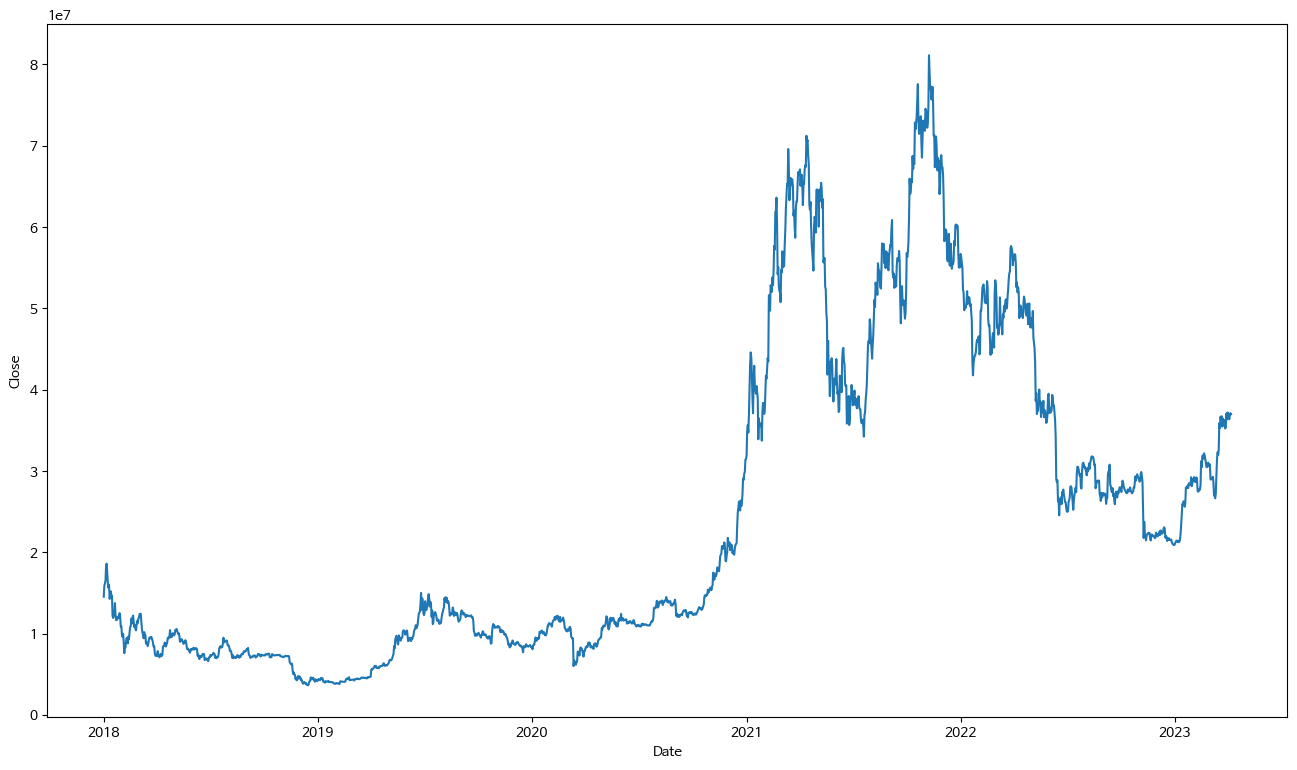

In [12]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

**시작**과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [13]:
# 비트코인 시세
btc = fdr.DataReader('BTC/KRW', '2019-01-01', '2020-12-01')
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,4171964.75,4290765.0,4133847.0,4284795.0,4284795.0,4820662946950
2019-01-02,4291491.50,4432793.5,4271306.5,4428835.0,4428835.0,5890487949740
2019-01-03,4415052.00,4431168.0,4308021.0,4316672.0,4316672.0,5096891156140
2019-01-04,4311528.00,4318403.5,4249898.5,4308451.5,4308451.5,5414399614310
2019-01-05,4302037.00,4361150.5,4285202.0,4294465.5,4294465.5,5737885889880
...,...,...,...,...,...,...
2020-11-27,18981806.00,19273284.0,18256780.0,18905298.0,18905298.0,42970743177752
2020-11-28,18910306.00,19729138.0,18686778.0,19578276.0,19578276.0,36025128041942
2020-11-29,19580728.00,20203958.0,19403352.0,20086742.0,20086742.0,34404090037004


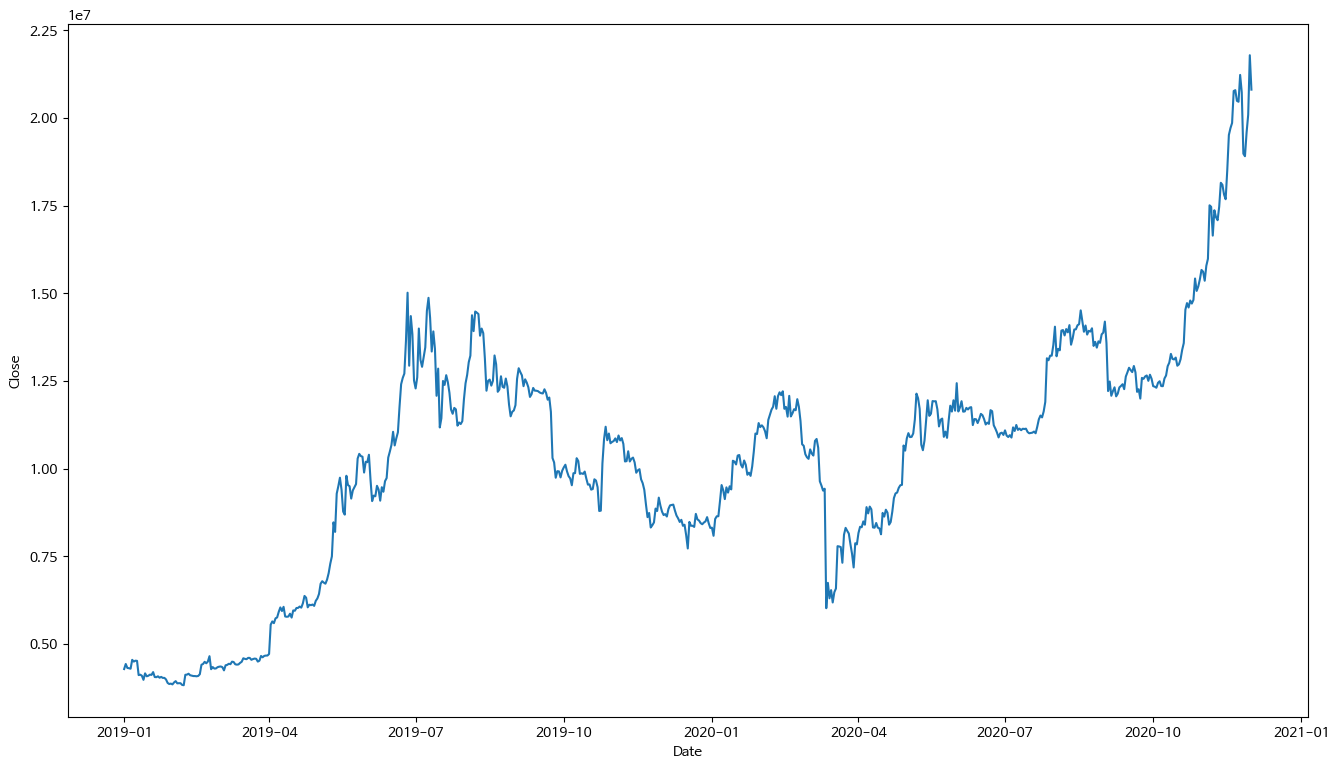

In [14]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

그 밖에 **금, 은과 같은 현물**, **달러와 같은 화폐** 데이터도 가져올 수 있습니다.

더욱 자세한 내용은 [GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader)를 참고해 보시기 바랍니다.

## 주가데이터 가져오기

In [15]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [16]:
stock = fdr.DataReader(STOCK_CODE)

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-18,1400,1423,1350,1350,634340,NaN
1998-12-21,1438,1509,1407,1509,720335,0.117778
1998-12-22,1509,1536,1446,1456,659030,-0.035123
1998-12-23,1513,1520,1482,1494,496480,0.026099
1998-12-24,1522,1549,1488,1532,941106,0.025435


In [18]:
stock.index

DatetimeIndex(['1998-12-18', '1998-12-21', '1998-12-22', '1998-12-23',
               '1998-12-24', '1998-12-28', '1999-01-04', '1999-01-05',
               '1999-01-06', '1999-01-07',
               ...
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-07'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [19]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-18,1400,1423,1350,1350,634340,NaN
1998-12-21,1438,1509,1407,1509,720335,0.117778
1998-12-22,1509,1536,1446,1456,659030,-0.035123
1998-12-23,1513,1520,1482,1494,496480,0.026099
1998-12-24,1522,1549,1488,1532,941106,0.025435


## 시각화

Text(0, 0.5, 'price')

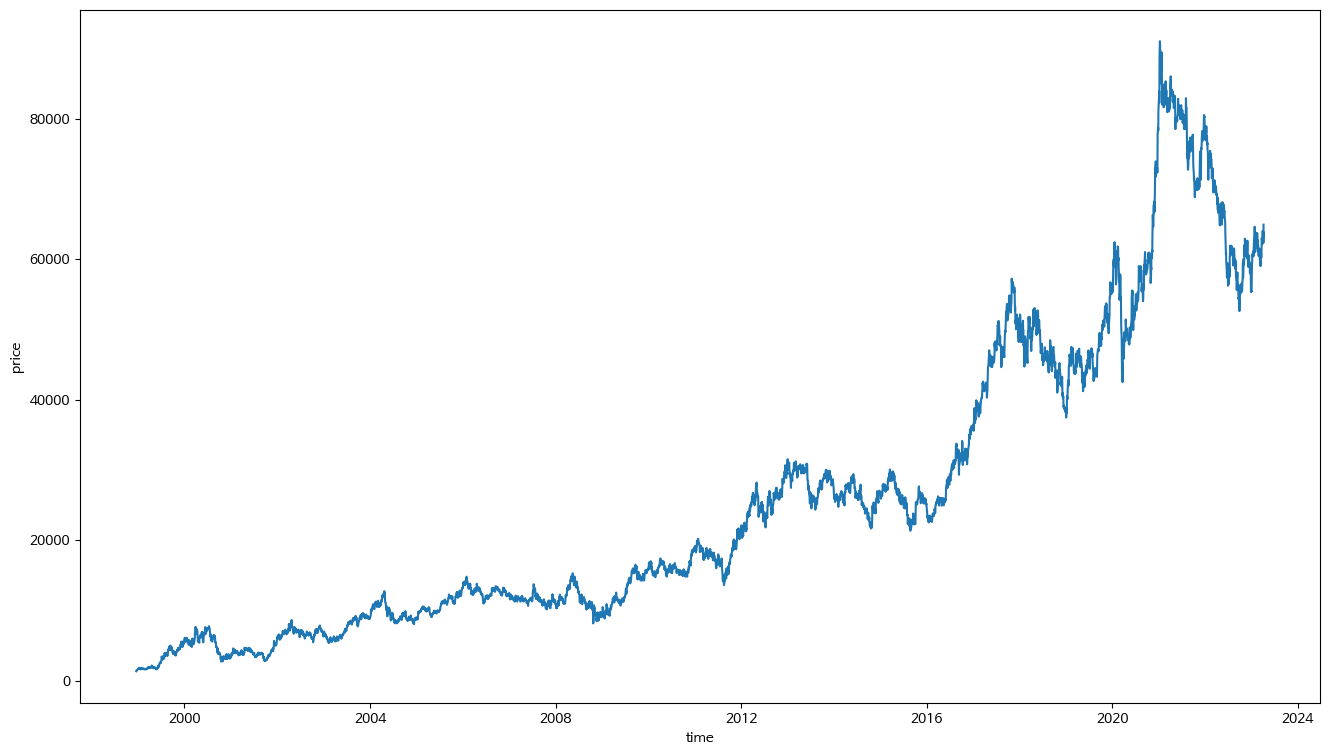

In [20]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

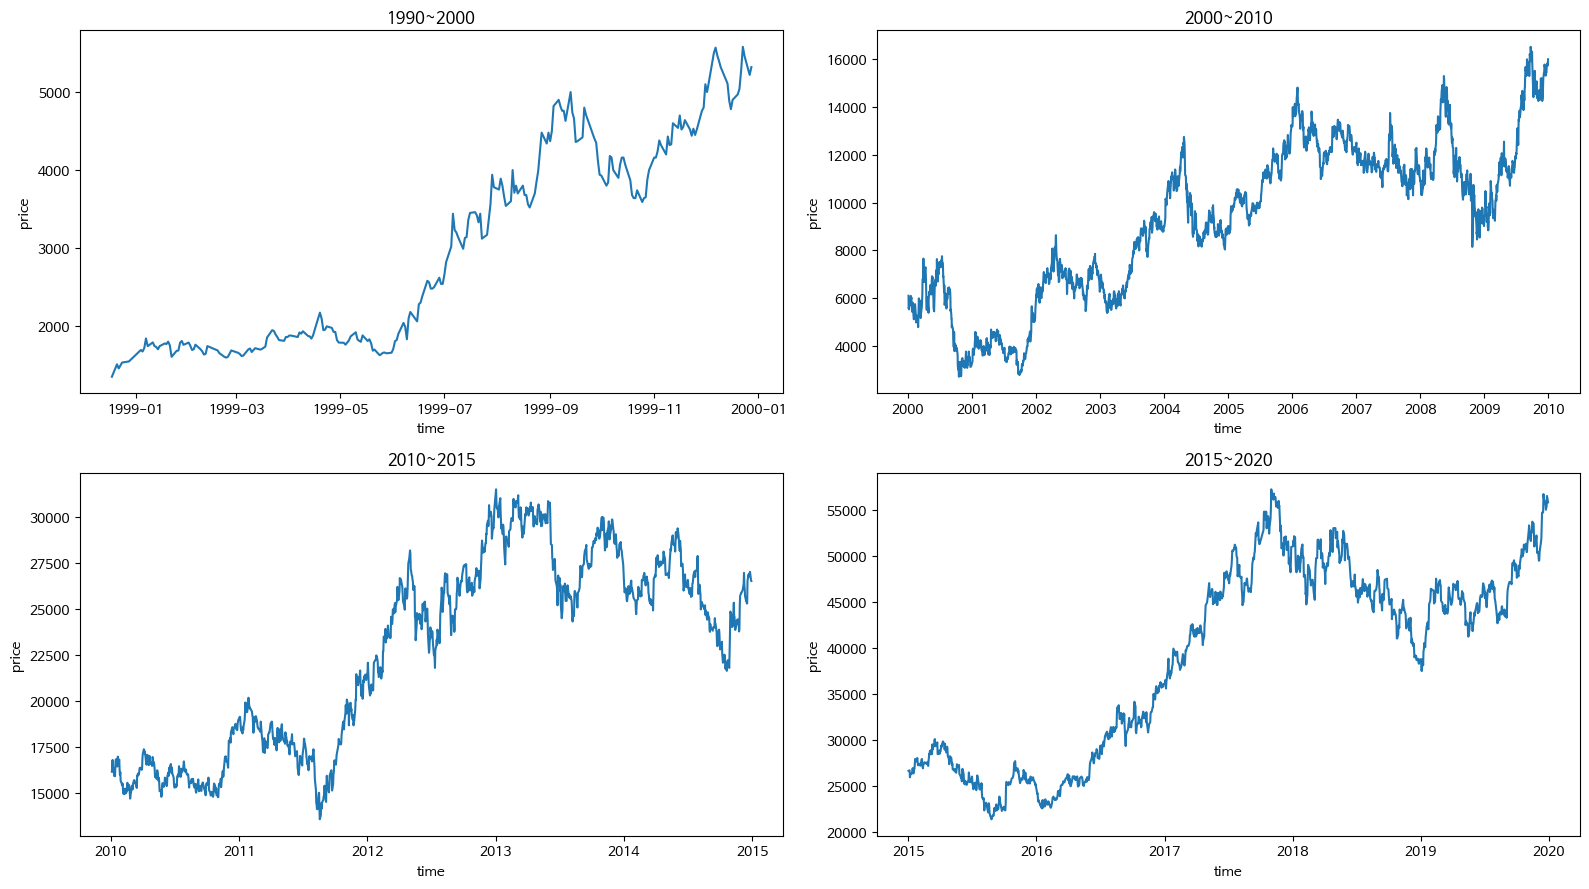

In [21]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [22]:
stock = fdr.DataReader(STOCK_CODE, '2019')

## Prophet

### 모듈 import

In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

### 컬럼

- 반드시 **y** 컬럼과 **ds** 컬럼이 존재해야합니다.
- 예측 값은 **y**, 시계열 데이터는 **ds**에 지정합니다.

In [25]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [26]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38750,2019-01-02
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,37600,2019-01-03
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,37450,2019-01-04
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38750,2019-01-07
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38100,2019-01-08


### prophet 객체 선언 및 학습

In [27]:
m = Prophet()
m.fit(stock)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/hvbfkbxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/o5g5urhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74779', 'data', 'file=/tmp/tmp2qxe4xzw/hvbfkbxq.json', 'init=/tmp/tmp2qxe4xzw/o5g5urhz.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelynrzrzxk/prophet_model-20230407042347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(Windows) 사용자의 경우 Error시 다음의 코드를 실행하여 추가 설치 후 진행합니다.

In [ ]:
# import cmdstanpy

# cmdstanpy.install_cmdstan()
# cmdstanpy.install_cmdstan(compiler=True) # only valid on Windows

**period**에 예측 하고 싶은 기간을 입력 합니다.

예측할 시계열 row가 추가 됩니다.

`periods`에 예측할 기간을 입력합니다.

In [28]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1080,2023-05-03
1081,2023-05-04
1082,2023-05-05
1083,2023-05-06
1084,2023-05-07


- `predict`로 예측을 진행합니다.
- `predict` 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.


In [29]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1080,2023-05-03,55681.671391,52343.243467,58254.772755,55569.416919,55771.307861,-485.367544,-485.367544,-485.367544,-415.775259,-415.775259,-415.775259,-69.592285,-69.592285,-69.592285,0.0,0.0,0.0,55196.303847
1081,2023-05-04,55654.736959,52153.947048,57859.288352,55531.333874,55752.597273,-640.255292,-640.255292,-640.255292,-473.307380,-473.307380,-473.307380,-166.947912,-166.947912,-166.947912,0.0,0.0,0.0,55014.481667
1082,2023-05-05,55627.802527,51989.510630,57828.070413,55495.284894,55749.441348,-696.581829,-696.581829,-696.581829,-438.476700,-438.476700,-438.476700,-258.105129,-258.105129,-258.105129,0.0,0.0,0.0,54931.220698
1083,2023-05-06,55600.868095,53489.940466,59007.629709,55458.588368,55735.090367,735.203311,735.203311,735.203311,1078.167925,1078.167925,1078.167925,-342.964614,-342.964614,-342.964614,0.0,0.0,0.0,56336.071405
1084,2023-05-07,55573.933663,53208.342854,59216.091330,55418.396354,55721.228902,656.716718,656.716718,656.716718,1078.167583,1078.167583,1078.167583,-421.450864,-421.450864,-421.450864,0.0,0.0,0.0,56230.650381


In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
1045,2023-03-27,58522.707936,55748.528747,61724.600224
1046,2023-03-28,58705.908351,55808.612829,61596.242105
1047,2023-03-29,58675.606782,55834.635141,61527.925751
1048,2023-03-30,58658.264426,55720.071008,61484.846563
1049,2023-03-31,58729.406976,55543.024896,61483.584081
1050,2023-04-03,58749.387263,55951.893090,61661.681252
1051,2023-04-04,58893.973687,56100.117067,61737.662653
1052,2023-04-05,58812.809322,55928.719369,61581.738207
1053,2023-04-06,58733.701237,55860.576504,61532.078382
1054,2023-04-07,58733.681026,55809.886633,61782.422618


### 시각화

`plot`은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.

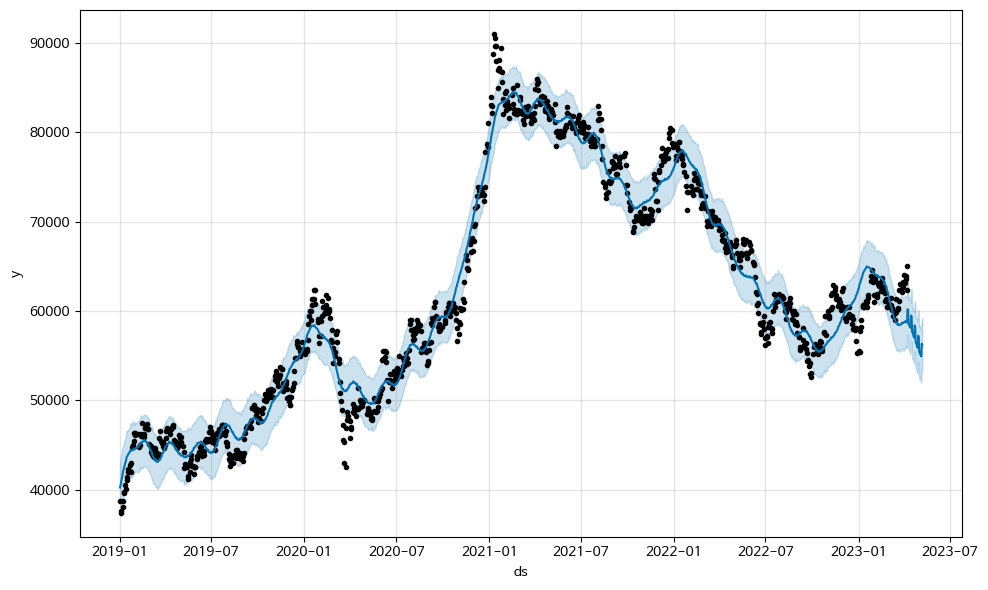

In [31]:
fig = m.plot(forecast)

### plotly 활용

In [32]:
fig = plot_plotly(m, forecast)
fig

### 컴포넌트 별 시각화

컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.

**trend, yearly, weekly 데이터를 시각화**하여 보여 줍니다.

In [33]:
plot_components_plotly(m, forecast)

### change points

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [34]:
from prophet.plot import add_changepoints_to_plot

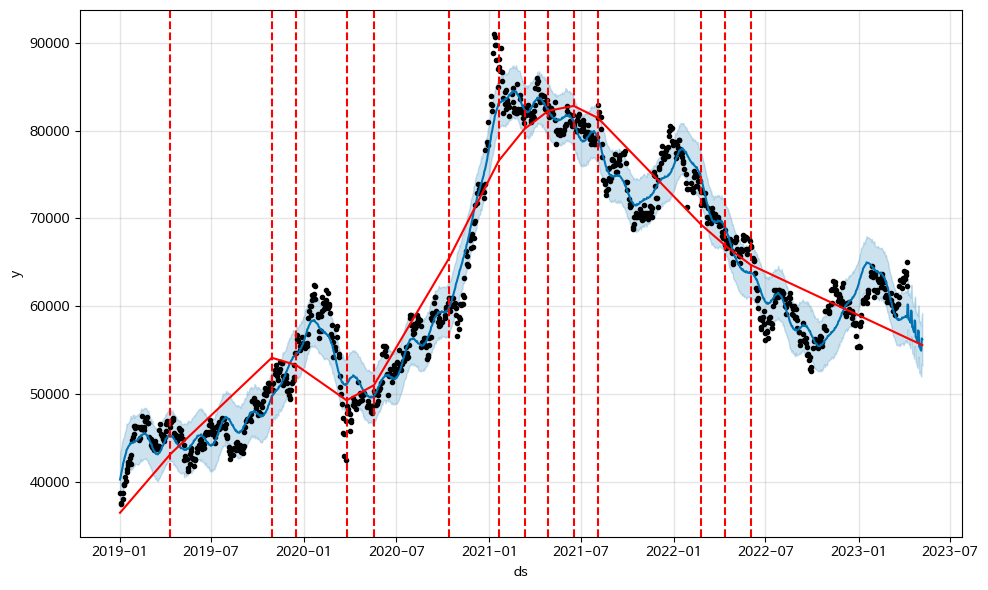

In [35]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

flexibility **계수가 낮으면 과소적합, 높으면 과대적합**하여 예측하게 됩니다.

중요한 hyperparameter 입니다.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/nqo55th3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/jdccxm8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46614', 'data', 'file=/tmp/tmp2qxe4xzw/nqo55th3.json', 'init=/tmp/tmp2qxe4xzw/jdccxm8n.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelvv41kc_3/prophet_model-20230407044001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


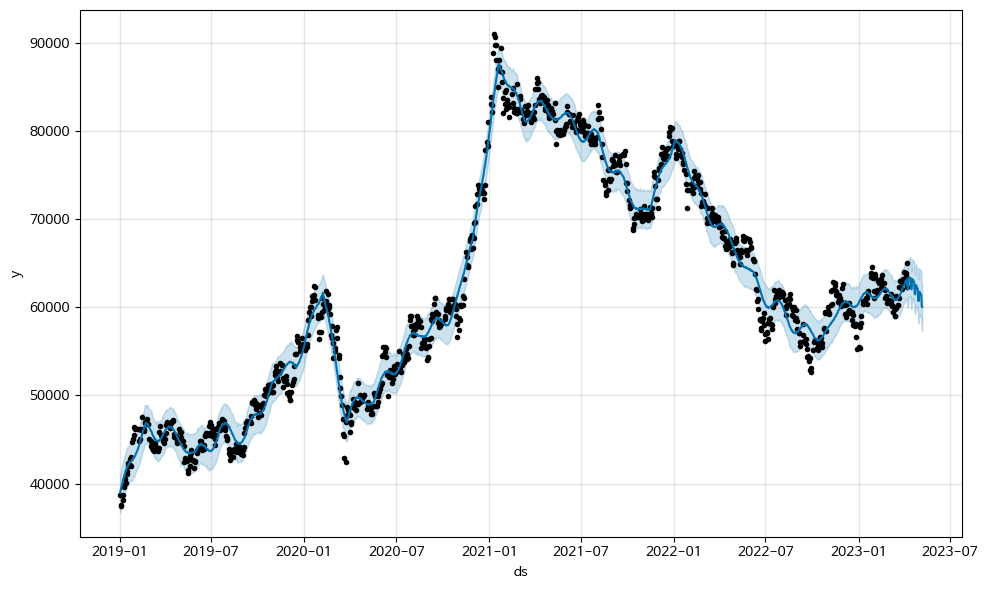

In [36]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/3i7wdw6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/50c9e567.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48575', 'data', 'file=/tmp/tmp2qxe4xzw/3i7wdw6i.json', 'init=/tmp/tmp2qxe4xzw/50c9e567.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelyxecwsvh/prophet_model-20230407044225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:42:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


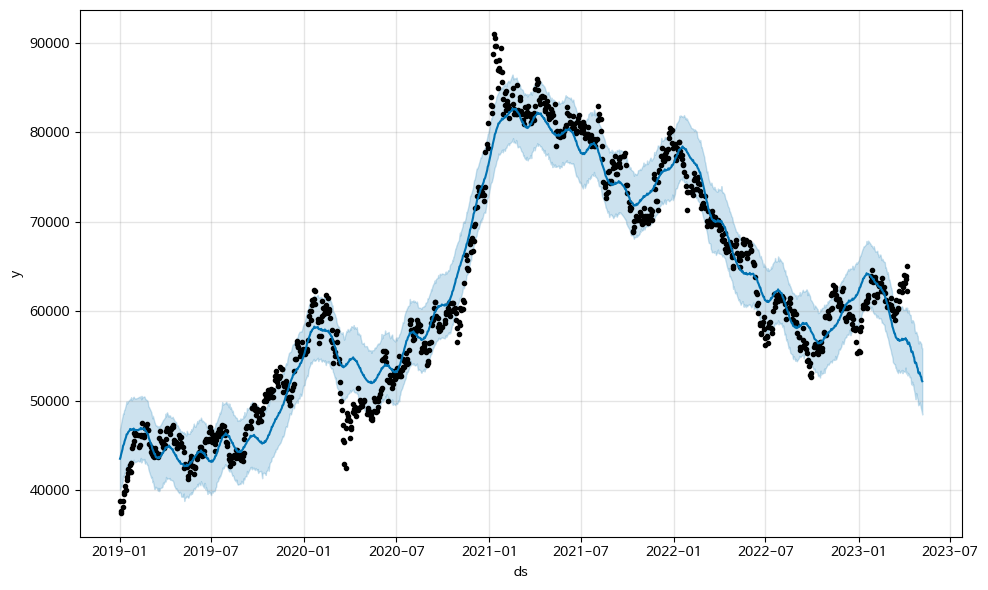

In [37]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

## 서울시 코로나 확진자 현황

[데이터셋 다운로드](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)

In [38]:
# 서울시 코로나 확진자 데이터 다운로드
import urllib.request

urllib.request.urlretrieve('https://www.dropbox.com/s/vv9mh6ciq9xnart/seoul_covid19.csv?dl=1', 'seoul_covid.csv')

('seoul_covid.csv', <http.client.HTTPMessage at 0x7f7cc8018400>)

In [39]:
corona = pd.read_csv('seoul_covid.csv')
corona

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


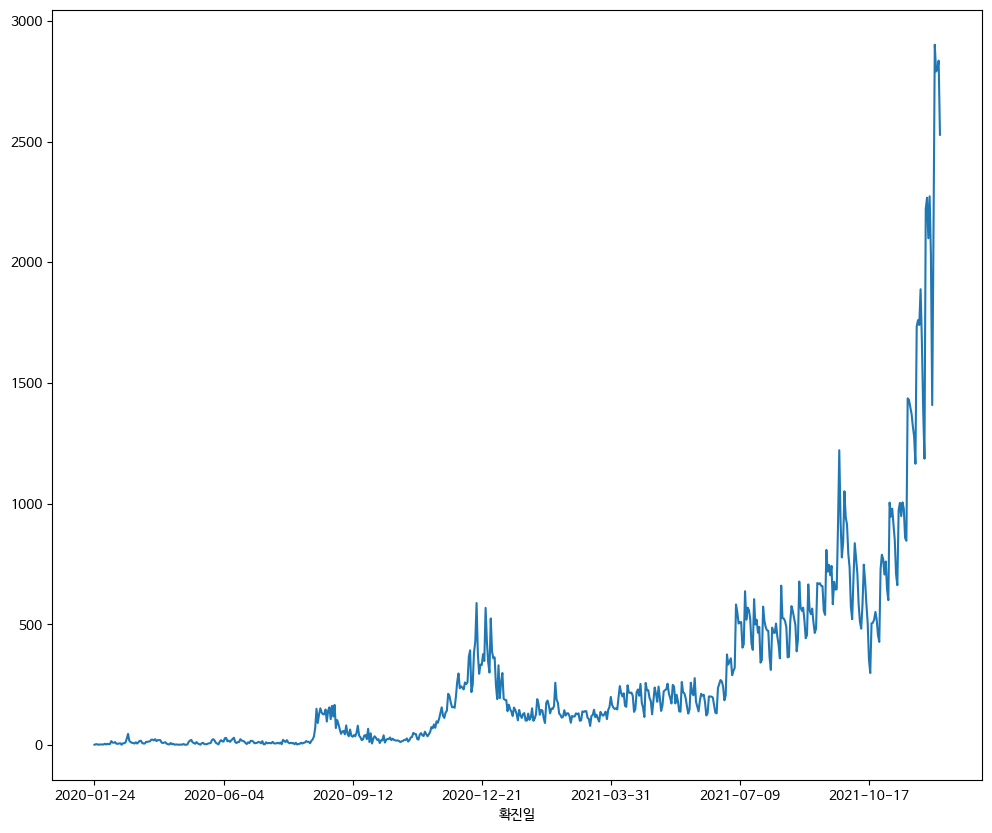

In [40]:
plt.figure(figsize=(12, 10))
corona.groupby('확진일')['연번'].count().plot()
plt.show()

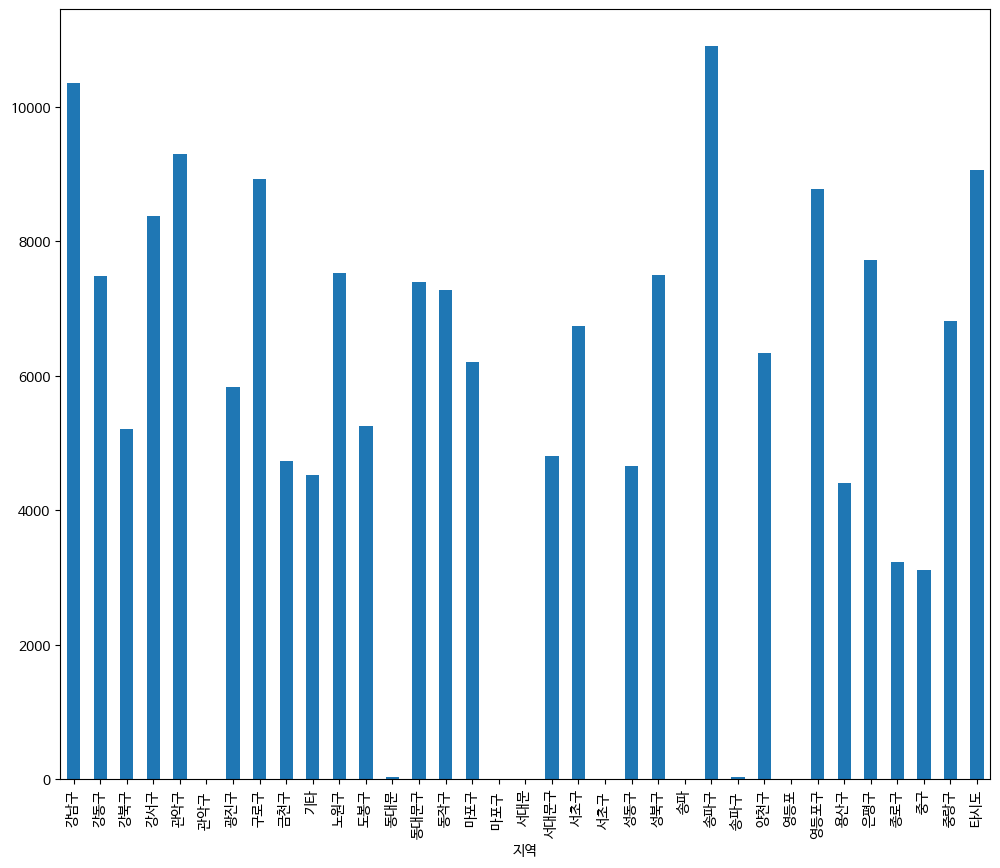

In [41]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

## 정확한 분석을 위한 데이터 클린징

공백이 들어간 경우

In [42]:
corona.loc[corona['지역'] == '관악구 ']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1428,181130,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1464,181094,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1774,180784,2021-12-11,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
12155,170403,2021-12-07,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


공백이 들어가지 않은 경우

In [43]:
corona.loc[corona['지역'] == '관악구']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
40,182518,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
51,182507,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
70,182488,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
91,182467,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
200,182358,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182440,118,2020-03-07,6845.0,NaN,510419-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182471,87,2020-02-29,3491.0,NaN,690602-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182484,74,2020-02-28,2466.0,NaN,700817-1,관악구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182505,53,2020-02-26,1295.0,NaN,800216-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


공백을 제거하는 함수 `strip()`활용

In [44]:
corona['지역'].apply(lambda x: x.strip())

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [45]:
corona['지역'] = corona['지역'].apply(lambda x: x.strip())

공백이 들어간 데이터가 제거되었음을 확인합니다.

In [46]:
corona.loc[corona['지역'] == '관악구 ']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


**구**가 빠진 지역명은 구를 추가합니다.

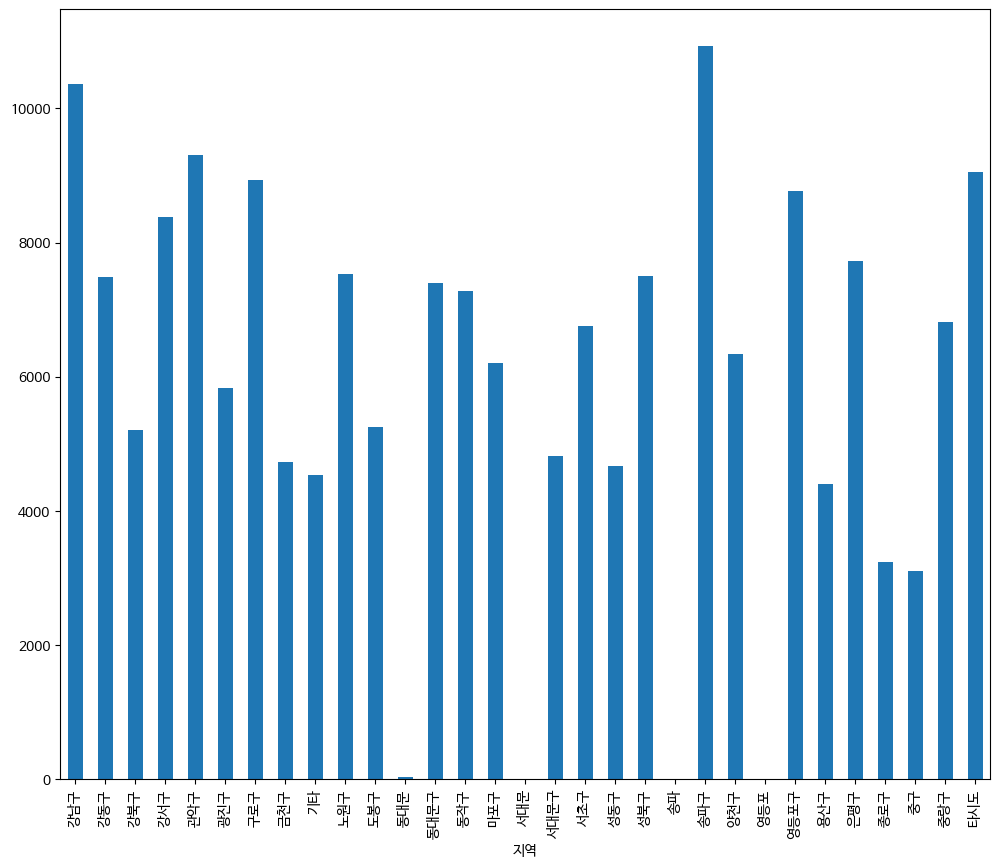

In [47]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

In [48]:
target = ['동대문', '서대문', '송파', '영등포']

In [49]:
corona['지역'].apply(lambda x: x + '구' if x in target else x).value_counts()

송파구     10932
강남구     10358
관악구      9300
타시도      9057
구로구      8932
영등포구     8779
강서구      8376
은평구      7721
노원구      7535
성북구      7504
강동구      7479
동대문구     7431
동작구      7273
중랑구      6815
서초구      6750
양천구      6341
마포구      6202
광진구      5826
도봉구      5251
강북구      5208
서대문구     4817
금천구      4735
성동구      4665
기타       4529
용산구      4399
종로구      3232
중구       3111
Name: 지역, dtype: int64

In [50]:
corona['지역'] = corona['지역'].apply(lambda x: x + '구' if x in target else x)

지역이 깔끔하게 전처리 되었음을 확인합니다.

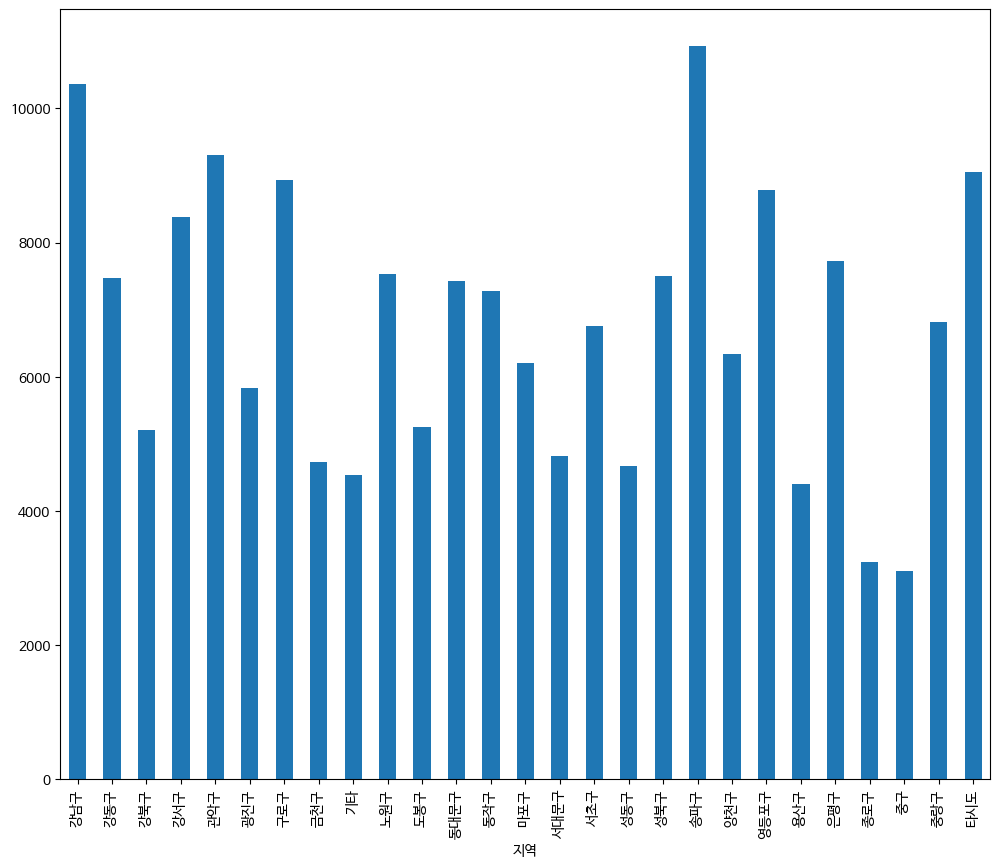

In [51]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

확진자 숫자를 기준으로 오름차순 정렬합니다.

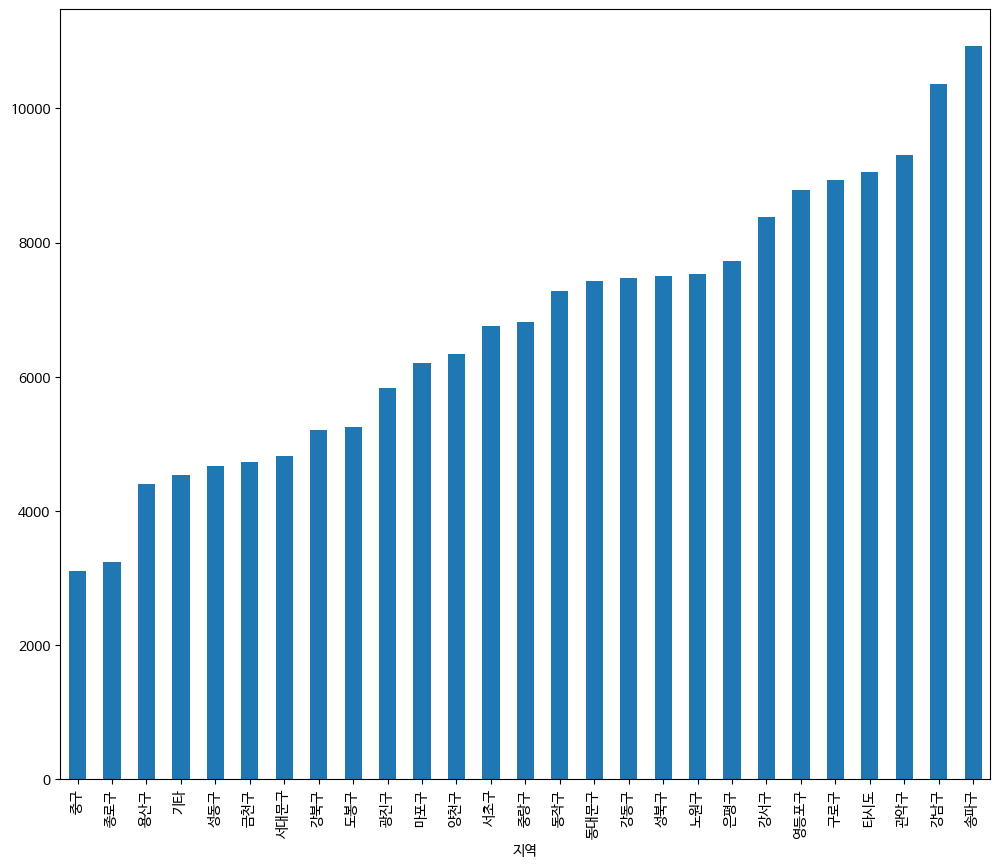

In [52]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().sort_values().plot(kind='bar')
plt.show()

In [53]:
import folium
import requests
import json

In [54]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [55]:
# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

In [56]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=corona.groupby('지역')['연번'].count().sort_values(),
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.3,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name=f'코로나 확진자 현황', 
            )
m

In [57]:
corona.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [58]:
corona_df = corona.groupby('확진일')['연번'].count().reset_index()
corona_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [59]:
corona_df.columns = ['ds', 'y']
corona_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [60]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

m = Prophet(changepoint_prior_scale=5.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
m.fit(corona_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/nb5382lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/4gh2_mpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71321', 'data', 'file=/tmp/tmp2qxe4xzw/nb5382lg.json', 'init=/tmp/tmp2qxe4xzw/4gh2_mpz.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelbih_m88l/prophet_model-20230407050924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [62]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
681,2022-01-06,1858.908141,1623.901217,2147.396526,1768.656892,1940.816343,26.717920,26.717920,26.717920,26.717920,26.717920,26.717920,0.0,0.0,0.0,1885.626061
682,2022-01-07,1869.355043,1618.175637,2144.664165,1775.205543,1957.583196,22.626842,22.626842,22.626842,22.626842,22.626842,22.626842,0.0,0.0,0.0,1891.981885
683,2022-01-08,1879.801946,1605.321154,2154.387968,1779.161927,1974.458205,-3.252506,-3.252506,-3.252506,-3.252506,-3.252506,-3.252506,0.0,0.0,0.0,1876.549440
684,2022-01-09,1890.248849,1550.509166,2075.717469,1783.021032,1993.621444,-59.651644,-59.651644,-59.651644,-59.651644,-59.651644,-59.651644,0.0,0.0,0.0,1830.597205
685,2022-01-10,1900.695752,1574.330958,2102.117778,1786.160304,2015.021542,-55.999277,-55.999277,-55.999277,-55.999277,-55.999277,-55.999277,0.0,0.0,0.0,1844.696475


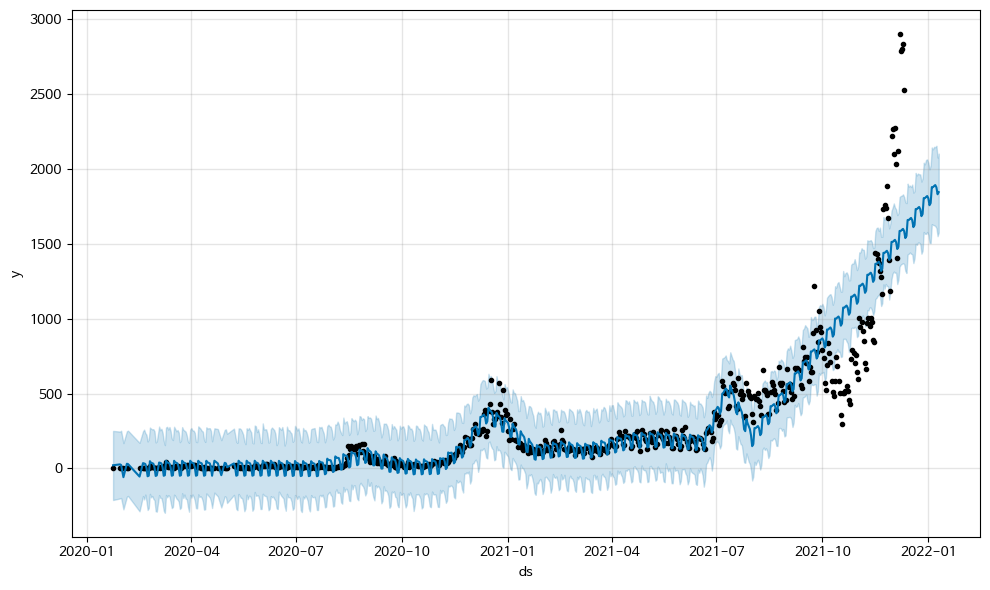

In [63]:
fig = m.plot(forecast)

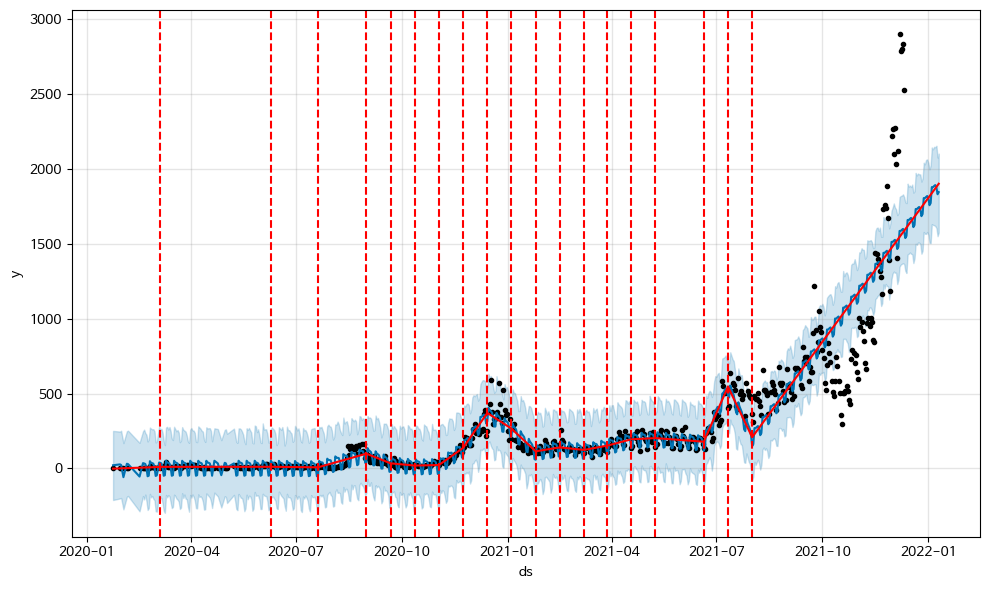

In [64]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/l6pl47e5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/wimtjf4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71697', 'data', 'file=/tmp/tmp2qxe4xzw/l6pl47e5.json', 'init=/tmp/tmp2qxe4xzw/wimtjf4f.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelbt6yerha/prophet_model-20230407051553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


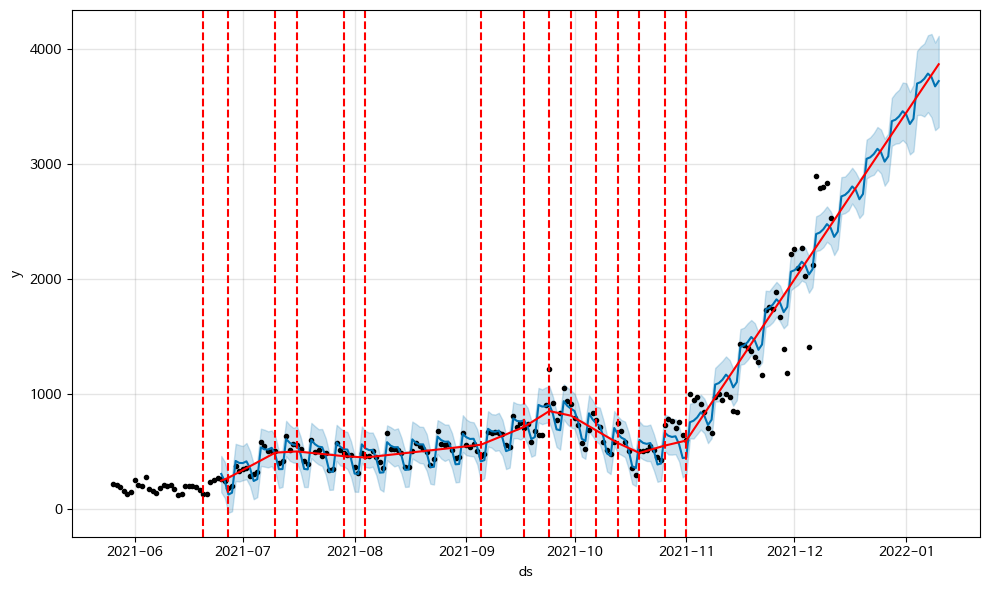

In [65]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 200
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/qm5au1vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/yt6ez8_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85010', 'data', 'file=/tmp/tmp2qxe4xzw/qm5au1vj.json', 'init=/tmp/tmp2qxe4xzw/yt6ez8_s.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelxm7iy7ci/prophet_model-20230407051601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


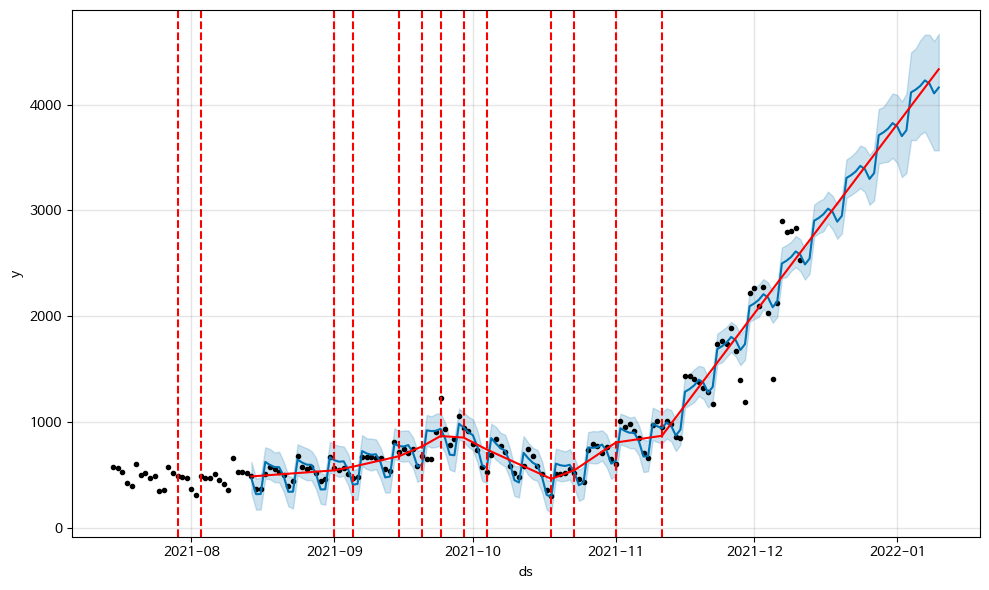

In [66]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 150
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/f_n2cc44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qxe4xzw/ddz4v49e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13658', 'data', 'file=/tmp/tmp2qxe4xzw/f_n2cc44.json', 'init=/tmp/tmp2qxe4xzw/ddz4v49e.json', 'output', 'file=/tmp/tmp2qxe4xzw/prophet_modelqo754l3g/prophet_model-20230407051610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


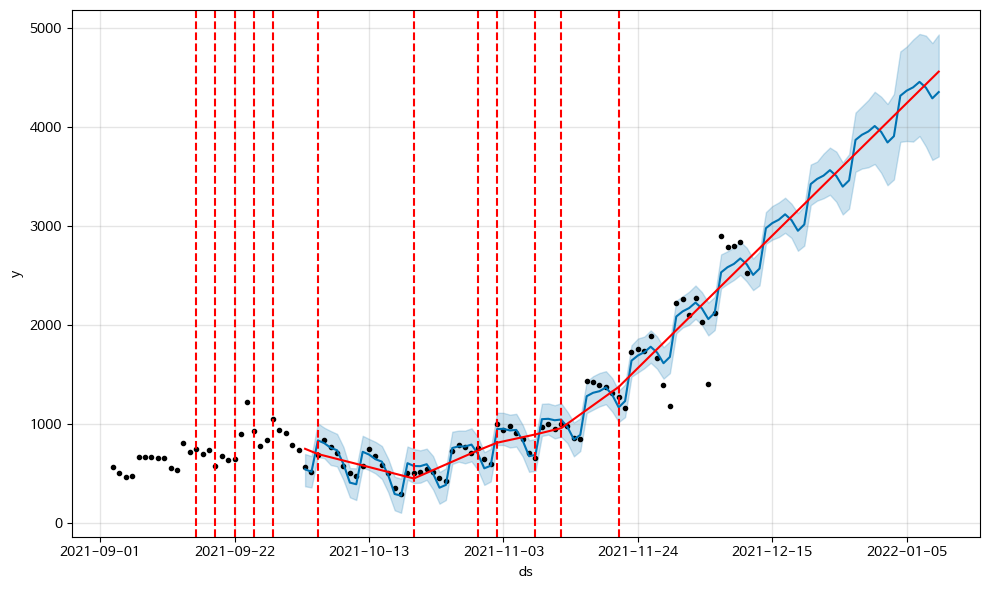

In [67]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 100
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)